In [2]:
import numpy as np

eps_N = -3
eps_G = -4
eps_A = -1
eps_NA = -1

eps_G_max = eps_N - np.log((1+np.exp(-eps_A)+np.exp(-eps_A-eps_NA))/(1+np.exp(-eps_A)))
eps_G_max2 = eps_N - np.log(np.exp(-eps_NA)-1)
print(-eps_N, -eps_G_max, -eps_G_max2)

3 4.094344276926158 3.541324854612918


0.26401558741392617 0.2640155874139923


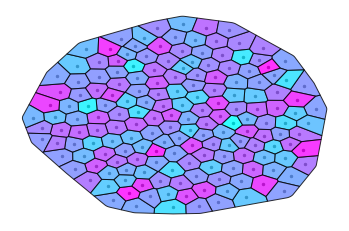

In [6]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh

Pos = np.array(pd.read_csv('testOrganoid.csv'))
FVmesh = initializeFVmesh(Pos)

def connectivity(FVmesh):
    X = np.zeros([FVmesh.nofCells, FVmesh.nofCells])

    for i in range(FVmesh.nofCells):
        for j in FVmesh.Neigh[i]:
            X[i,j] += 1/len(FVmesh.Neigh[i])
 
    return X


X = connectivity(FVmesh)
eta_n = np.exp(3)
eta_g = np.exp(4)
eta_a = np.exp(1)
eta_na = np.exp(1)

A = np.eye(FVmesh.nofCells) + eta_a*X
b = np.dot(X, np.ones(FVmesh.nofCells))*(1-1/eta_g)

a = np.linalg.solve(A, b)
g = np.linalg.solve(X, a)

print(min(g), max(g))
FVmesh.plot(g)

In [9]:
from sympy import *
x, a = symbols('x, a')

p = x*a/(1+(x)*a)
integrate(p, a)

x*(a/x - log(a*x + 1)/x**2)

2.718281828459045


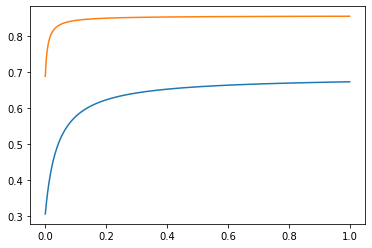

In [62]:
import numpy as np
import matplotlib.pyplot as plt

eta_a = np.exp(4)
eta_b = np.exp(3)
eta_c = np.exp(2)
eta = np.exp(1)

b = 0.2
c = 0.3
a = np.linspace(0,1,1000)

eta2 = eta#1/(eta_a*a)*((1+eta_a*a)**2/(1+eta_b*b + eta_a*a) - 1)  #np.exp(-3)
print(eta2)

p_C1 = eta_c*c*(1+eta_a*a)/(1 + eta_c*c*(1+eta_a*a) + eta_b*b + eta_a*a)
p_C2 = eta_c*c*(1+eta_a*eta2*a)/(1 + eta_c*c*(1+eta_a*eta2*a) + eta_a*a)
#p_C3 = eta_c*c/(1 + eta_c*c)

plt.plot(a, p_C1)
plt.plot(a, p_C2)
#plt.plot(c, p_C3, 'k--')

False


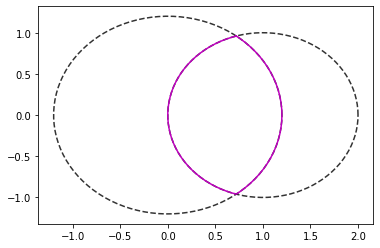

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

TE1 = lambda theta: 1.2*np.array([1*np.cos(theta),1*np.sin(theta)]).T
TE2 = lambda theta: np.array([1*np.cos(theta) + 1,1*np.sin(theta)]).T

TEvals1 = TE1(np.linspace(0,2*np.pi, 100))
TEpoly1 = Polygon(TEvals1)

TEvals2 = TE2(np.linspace(0,2*np.pi, 100))
TEpoly2 = Polygon(TEvals2)

poly = TEpoly1.intersection(TEpoly2)
print(poly.is_empty)


x,y = TEpoly1.exterior.xy
plt.plot(x,y, 'k--', alpha = 0.8)

x,y = TEpoly2.exterior.xy
plt.plot(x,y, 'k--', alpha = 0.8)

x,y = poly.exterior.xy
plt.plot(x,y, 'm')

In [29]:
from scipy.spatial.distance import cdist

a = np.random.rand(6)

print(a, np.maximum(a, 1))

[0.51356955 0.9835461  0.15751447 0.63753187 0.30684477 0.88062042] [1. 1. 1. 1. 1. 1.]


In [70]:
a=np.linspace(0,100,5)
np.tile(a,(2,1)).T

array([[  0.,   0.],
       [ 25.,  25.],
       [ 50.,  50.],
       [ 75.,  75.],
       [100., 100.]])

<Figure size 432x288 with 0 Axes>

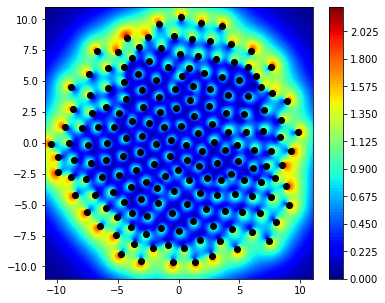

In [166]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh
import matplotlib.pyplot as plt

Pos = np.array(pd.read_csv('testOrganoid.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)

plt.figure()

def f(x):
    return np.exp(-.9*x)
    

def velocity(x,y,pos):
    norm = ((x-pos[0])**2 + (y-pos[1])**2)**(1/2)
    u = (x-pos[0])/norm*f(norm)
    v = (y-pos[1])/norm*f(norm)
    
    u[(x-pos[0])**2 + (y-pos[1])**2 == 0] = 0
    v[(x-pos[0])**2 + (y-pos[1])**2 == 0] = 0
    
    return u, v

x = np.linspace(-11,11,300)
y = np.linspace(-11,11,300)
X,Y = np.meshgrid(x,y)

U = np.zeros(X.shape)
V = np.zeros(X.shape)
for p in Pos:
    dU, dV = velocity(X,Y,p)
    U += dU
    V += dV
    
plt.figure(figsize=(6,5))
#plt.quiver(X,Y,U,V)
plt.contourf(X,Y,(U**2+V**2)**(1/2),100, cmap = 'jet')
plt.colorbar()
plt.scatter(Pos[:,0],Pos[:,1], color='k')

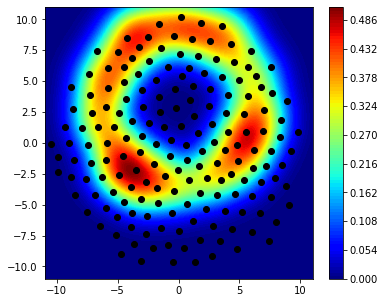

In [100]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh
import matplotlib.pyplot as plt

Pos = np.array(pd.read_csv('testOrganoid.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)

v = [0,3]
def signal(x,y,pos):
    val = ((x-pos[0])**2 + (y-pos[1])**2 - 2*v[0]*(x-pos[0]) - 2*v[1]*(y-pos[1]) + v[0]**2 + v[1]**2)
    D = 1
    s = 1/(4*np.pi*D)*np.exp(-val/(4*D))
    
    return s

x = np.linspace(-11,11,300)
y = np.linspace(-11,11,300)
X,Y = np.meshgrid(x,y)

S = np.zeros(X.shape)
for i in range(0,len(Pos)):
    if (Pos[i,0]**2 + Pos[i,1]**2)**(1/2) < 8 and (Pos[i,0]**2 + Pos[i,1]**2)**(1/2) > 5:
        S += signal(X,Y,Pos[i])
    
plt.figure(figsize=(6,5))
#plt.quiver(X,Y,U,V)
plt.contourf(X,Y,S, 100, cmap = 'jet')
plt.colorbar()
plt.scatter(Pos[:,0],Pos[:,1], color='k')

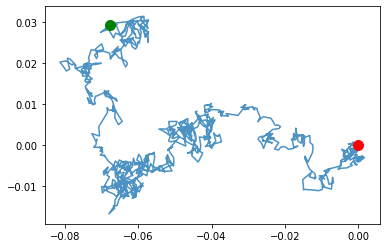

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T = 1
N = 1000
t = np.linspace(0,T,N)

v = 1
x = np.empty([len(t),2])
x[0] = [0,0]
for i in range(N-1):
    x[i+1] = x[i] + v*np.random.normal(0,t[i+1]-t[i],2)
    
plt.plot(x[:,0],x[:,1], alpha = 0.8)
plt.plot(x[0,0],x[0,1], 'ro', ms = 10)
plt.plot(x[-1,0],x[-1,1], 'go', ms = 10)

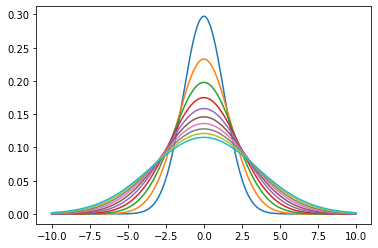

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kv

x0 = np.linspace(-10,10,1000)
T = np.linspace(0.3,2,10)
u = np.ones(len(x0))
u[x0<0] = -1
u *= 6
D = 3

for t in T:
    x = x0# - u*t
    #G1 = 3/(np.pi*t)**(1/2)*np.exp(-(x+4)**2/4/t)
    G2 = 1/(4*np.pi*D*t)**(1/2)*np.exp(-x**2/(4*D*t))
    #G3 = 4/(np.pi*t)**(1/2)*np.exp(-(x-4)**2/4/t)
    #plt.plot(x0,G1+G2+G3)
    plt.plot(x0,G2)

C:\Users\simon\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: floating point number truncated to an integer
  # This is added back by InteractiveShellApp.init_path()


(0, 1)

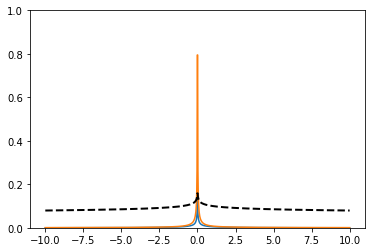

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kn

x = np.linspace(-10,10,1000)
n = 3


l = 0.1
k = 0.1
F = l*1/(2*np.pi)**(n/2)*kn(n/2-1,k*abs(x))*(k/abs(x))**(n/2-1)
G = l*np.exp(-k**2*abs(x))/(4*np.pi*abs(x))
plt.plot(x,F, x,G)
plt.plot(x,.1/abs(x)**0.1, '--k', lw = 2)
    
plt.ylim([0,1])

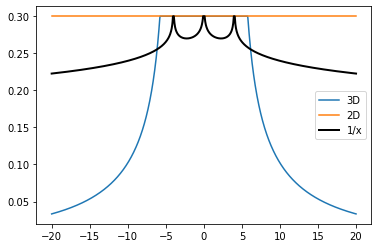

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kn

x = np.linspace(-20,20,1000)

k = 0.01
l = 50

F1 = l*.1*np.exp(-k**(1/2)*abs(x+4))/(4*np.pi*abs(x+4))
F2 = l*.1*np.exp(-k**(1/2)*abs(x))/(4*np.pi*abs(x))
F3 = l*.1*np.exp(-k**(1/2)*abs(x-4))/(4*np.pi*abs(x-4))
plt.plot(x,np.minimum(F1+F2+F3,.3))

F1_2D = l*.1/(2*np.pi)*kn(0,k**(1/2)*abs(x+4))
F2_2D = l*.1/(2*np.pi)*kn(0,k**(1/2)*abs(x))
F3_2D = l*.1/(2*np.pi)*kn(0,k**(1/2)*abs(x-4))
plt.plot(x,np.minimum(F1_2D+F2_2D+F3_2D,.3))

n = 0.1
F1_test = .1/abs(x+4)**n
F2_test = .1/abs(x)**n
F3_test = .1/abs(x-4)**n
plt.plot(x,np.minimum(F1_test+F2_test+F3_test,.3), color='k', lw = 2)
#plt.ylim([0,5])
plt.legend(['3D','2D','1/x'])

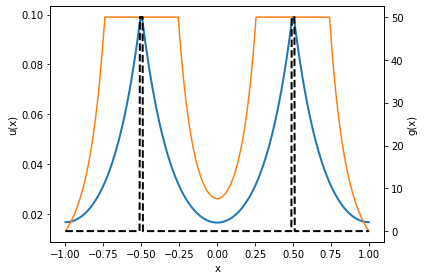

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint

N = 1000
x = np.linspace(-1,1,N)
dx = x[1]-x[0]
D = 1
k = 5
epsilon = 0.01

#RHS = np.exp(-(x-x[250])**2/(2*epsilon))/(2*np.pi*epsilon)**(1/2) + np.exp(-(x-x[750])**2/(2*epsilon))/(2*np.pi*epsilon)**(1/2)
RHS = np.zeros(len(x))
RHS[(x > -0.5-epsilon) & (x < -0.5+epsilon)] = 1/2/epsilon
RHS[(x > 0.5-epsilon) & (x < 0.5+epsilon)] = 1/2/epsilon
RHS[0] = 0
RHS[-1] = 0

def Eq2Mat(eq, N):
    E = np.eye(N)
    Mat = np.empty([N,N])
    
    for i in range(N):
        Mat[:,i] = eq(E[:,i])

    return Mat
    
def lhs(u):
    val = np.zeros(N)
    val[1:-1] = D/dx**2*(-2*u[1:-1] +  u[2:] +  u[0:-2]) - k**2*u[1:-1]

    val[0] = (u[1]-u[0])/dx
    val[-1] = (u[-1]-u[-2])/dx

    
    return val

LHS = Eq2Mat(lhs, N)

u = np.linalg.solve(-LHS, RHS)


fig, ax1 = plt.subplots()
ax1.plot(x, u, lw=2)
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
F1 = np.exp(-k*abs(x-.5))/(4*np.pi*abs(x-.5))
F2 = np.exp(-k*abs(x+.5))/(4*np.pi*abs(x+.5))
ax1.plot(x,np.minimum(F1+F2,max(u)))

ax2 = ax1.twinx()
ax2.plot(x, RHS, '--k', lw=2)
ax2.set_ylabel('g(x)')

fig.tight_layout()
plt.show()    


C:\Users\simon\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


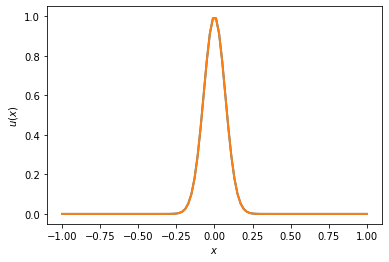

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import HTML
from matplotlib.animation import FuncAnimation


# Parameters
T = 10
Nt = 200
Nx = 100
D = 0.01

# Discretization
t = np.linspace(0,T,Nt)
x = np.linspace(-1,1,Nx)
dt = t[1]-t[0]
dx = x[1]-x[0]

# Initial value
#u0 = np.zeros(len(x))
#u0[(x > -0.2) & (x < 0.1)] = 1
u0 = np.exp(-100*x**2)
Dx = D*np.ones(len(x))
Dx[(x > -0.1) & (x < 0.1)] = 10
DxL = np.roll(Dx,1)
DxR = np.roll(Dx,-1)

# Stating the right hand side

def f(u):
    return 1/(1-u+1e-7)/(u+1e-7)

def rhs(u, t):
    uL = np.roll(u,1)
    uR = np.roll(u,-1)
    
    jR = (uR-u)/dx*(DxR+Dx)/2
    jL = (u-uL)/dx*(Dx+DxL)/2
    return (jR-jL)/dx

def rhslin(u, t):
    uL = np.roll(u,1)
    uR = np.roll(u,-1)
    jR = (uR-u)/dx
    jL = (u-uL)/dx
    return D*(jR-jL)/dx

# Solving the PDE
u = odeint(rhs, u0, t)
v = odeint(rhslin, u0, t)

# Visualization
fig, ax = plt.subplots()
def update(i):
    plt.cla()
    plt.plot(x,u[i,:], linewidth=2)
    plt.plot(x,v[i,:], linewidth=2)
    plt.xlabel('$x$')
    plt.ylabel('$u(x)$')
    plt.ylim(-0.05,1.05)
    
ani = FuncAnimation(fig, update, frames=Nt, interval=1)
HTML(ani.to_jshtml())

In [61]:
3*np.pi

9.42477796076938